<h1 style='color: green; font-size: 36px; font-weight: bold;'>Data Science - Regressão Linear II</h1>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import seaborn as sns

## O Dataset e o Projeto
<hr>

### Descrição:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>O mercado imobiliário vem sendo objeto de diversos estudos e pesquisas nos últimos tempos. A crise financeira que afeta a economia tem afetado significativamente os investimentos e ganhos advindos deste setor. Este cenário incentiva o aumento do interesse por estudos de previsão de demanda baseados em características deste mercado, dos imóveis e do entorno destes imóveis.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Neste contexto o objetivo principal do nosso projeto é desenvolver um sistema de avaliação imobiliária utilizando a metodologia de regressões lineares que é uma das técnicas de machine learning.</p>

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify; text-indent: 35px;'>Nosso *dataset* é uma amostra aleatória de tamanho 5000 de imóveis disponíveis para venda no município do Rio de Janeiro.</p>

### Dados:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Valor</b> - Valor (R$) de oferta do imóvel</li>
    <li><b>Area</b> - Área do imóvel em m²</li>
    <li><b>Dist_Praia</b> - Distância do imóvel até a praia (km) (em linha reta)</li>
    <li><b>Dist_Farmacia</b> - Distância do imóvel até a farmácia mais próxima (km) (em linha reta)</li>
</ul>

## Leitura dos dados

In [4]:
df_dados = pd.read_csv('../Dados/dataset.csv', sep=';')

## Visualizar os dados

In [5]:
df_dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


## Verificando o tamanho do dataset

In [6]:
df_dados.shape

(5000, 4)

# <font color='red' style='font-size: 30px;'>Análises Preliminares</font>
<hr style='border: 2px solid red;'>

## Estatísticas descritivas

In [7]:
df_dados.describe()

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,1.402926e+06,121.944800,3.021920,0.497160
std,1.883269e+06,90.536969,3.170933,0.291355
min,7.500000e+04,16.000000,0.000000,0.000331
25%,4.600000e+05,70.000000,0.438417,0.238640
50%,8.200000e+05,93.000000,1.476958,0.503260
75%,1.590000e+06,146.000000,5.605379,0.747737
max,2.500000e+07,2000.000000,17.962942,0.999987


## Matriz de correlação

<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [8]:
df_dados.corr().round(3)

,Valor,Area,Dist_Praia,Dist_Farmacia
Valor,1.000,0.711,-0.367,-0.024
Area,0.711,1.000,-0.283,-0.031
Dist_Praia,-0.367,-0.283,1.000,0.026
Dist_Farmacia,-0.024,-0.031,0.026,1.000


# <font color='red' style='font-size: 30px;'>Comportamento da Variável Dependente (Y)</font>
<hr style='border: 2px solid red;'>

## Configurações de formatação dos gráficos

In [9]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('whitegrid')

## Box plot da variável *dependente* (y)

In [10]:
df_dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia
0,4600000,280,0.240925,0.793637
1,900000,208,0.904136,0.134494
2,2550000,170,0.059525,0.423318
3,550000,100,2.883181,0.525064
4,2200000,164,0.239758,0.192374


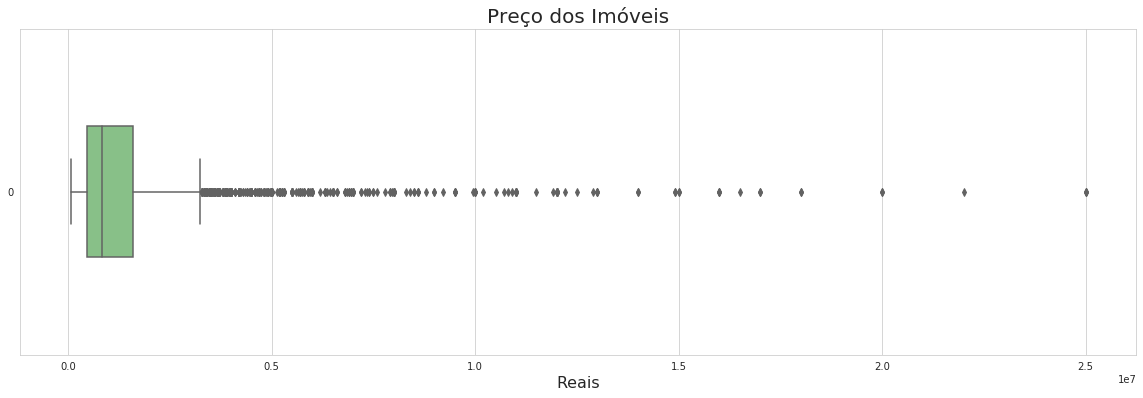

In [11]:
ax = sns.boxplot(data=df_dados['Valor'], orient='h', width=0.4)
ax.figure.set_size_inches(20, 6)
ax.set_title('Preço dos Imóveis', fontsize=20)
ax.set_xlabel('Reais', fontsize=16)
ax

<i>Observa-se que a maior parte dos imóveis em valores mais baixos, com percentuais mais próximos de 0, e poucos valores mais altos, 0.3 em diante<i/>

# <font color='red' style='font-size: 30px;'>Distribuição de Frequências</font>
<hr style='border: 2px solid red;'>

## Distribuição de frequências da variável *dependente* (y)

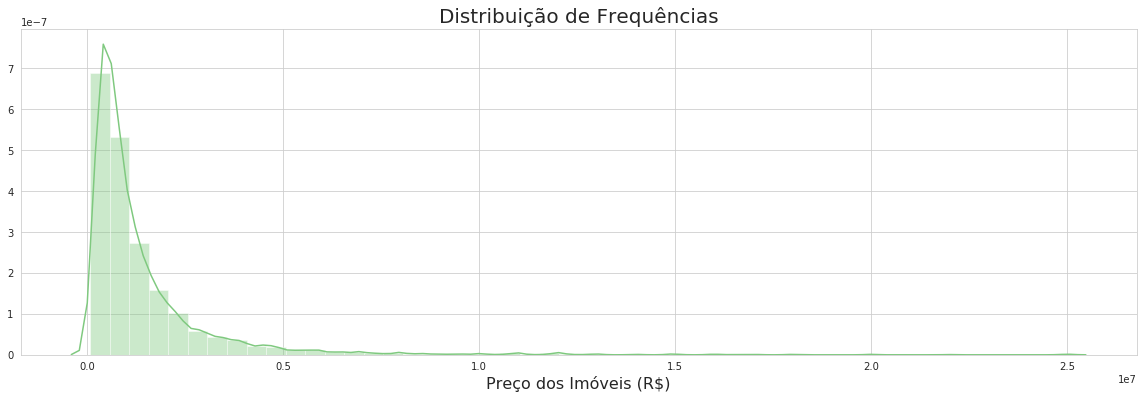

In [12]:
ax = sns.distplot(df_dados['Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('Preço dos Imóveis (R$)', fontsize=16)
ax

<i>No gráfico de distribuição se vê o mesmo resultado do box plot, uma grande distribuição de imóveis com preços mais baixos (à esquerda) e poucos com o preço mais elevado (à direita). Isso faz muito sentido, já que existe uma quantidade muito maior de imóveis mais baratos do que imóveis de luxo.<i/>

<img width='800px' src='../Dados/img/Box-Plot II.png'>

# <font color='red' style='font-size: 30px;'>Dispersão Entre as Variáveis</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis do dataset

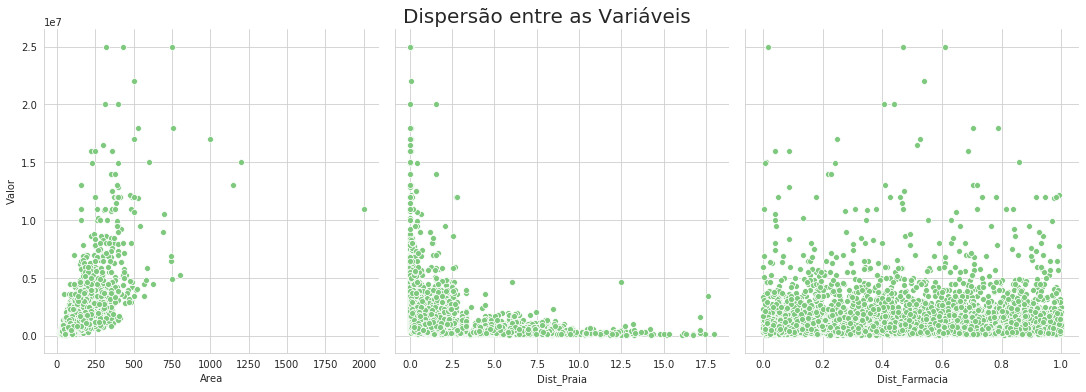

In [13]:
ax = sns.pairplot(df_dados, y_vars=['Valor'], x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

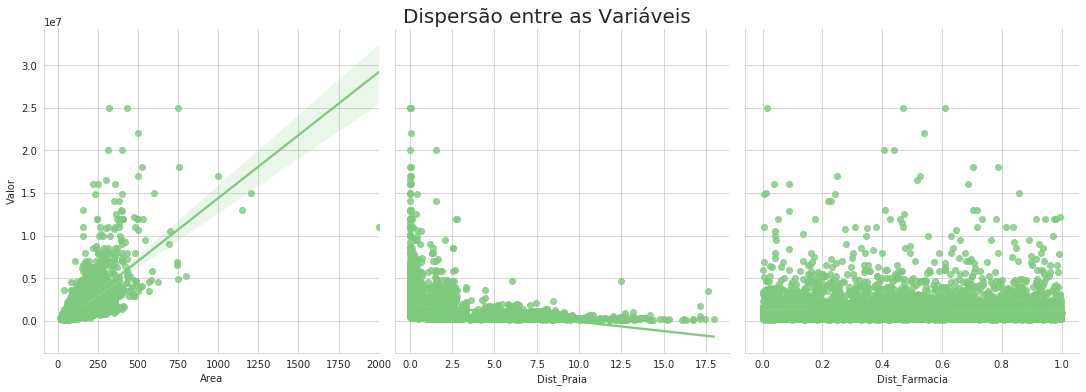

In [14]:
#Aplicando reta de regressão
ax = sns.pairplot(df_dados, y_vars=['Valor'], x_vars=['Area', 'Dist_Praia', 'Dist_Farmacia'], height=5, kind='reg')
ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

# <font color='red' style='font-size: 30px;'>Transformando os Dados</font>
<hr style='border: 2px solid red;'>

## Distribuição Normal


In [15]:
df_dados.describe().round(2)

,Valor,Area,Dist_Praia,Dist_Farmacia
count,5000.00,5000.00,5000.00,5000.00
mean,1402926.39,121.94,3.02,0.50
std,1883268.85,90.54,3.17,0.29
min,75000.00,16.00,0.00,0.00
25%,460000.00,70.00,0.44,0.24
50%,820000.00,93.00,1.48,0.50
75%,1590000.00,146.00,5.61,0.75
max,25000000.00,2000.00,17.96,1.00


## Aplicando a transformação logarítmica aos dados do *dataset*

<i> Utiliza-se essa transformação pois foi identificada uma assimetria à direita na distribuição e também não foi possível identificar uma relação linear entre as variáveis explicativas. O formato logarítmico visa corrigir essas questões para que seja feita uma análise mais acertiva<i/>

In [16]:
np.log(0)

/home/gabriel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

<i>Quando é passado um valor 0 no log, é retornado '-inf',  significando que quando X (variáveis explicativas) for igual 0 não existe valor para y (preço dos imóveis) ela vai até o infinito.<i/>

In [17]:
df_dados['log_Valor'] = np.log(df_dados['Valor'])
df_dados['log_Area'] = np.log(df_dados['Area'])

#Alguns dados das colunas Dist_Praia e Dist_Farmacia possuem valor 0 (oberservar linha 'min'), por isso as análises gráficas feitas acimam
#eram assimétricas. Para corrigir esse problema, somasse os valores dessas variáveis + 1, para que não hajam valores zerados.
df_dados['log_Dist_Praia'] = np.log(df_dados['Dist_Praia']+1)   
df_dados['log_Dist_Farmacia'] = np.log(df_dados['Dist_Farmacia']+1)

In [18]:
df_dados.head()

,Valor,Area,Dist_Praia,Dist_Farmacia,log_Valor,log_Area,log_Dist_Praia,log_Dist_Farmacia
0,4600000,280,0.240925,0.793637,15.341567,5.634790,0.215857,0.584245
1,900000,208,0.904136,0.134494,13.710150,5.337538,0.644028,0.126187
2,2550000,170,0.059525,0.423318,14.751604,5.135798,0.057821,0.352991
3,550000,100,2.883181,0.525064,13.217674,4.605170,1.356655,0.422036
4,2200000,164,0.239758,0.192374,14.603968,5.099866,0.214916,0.175946


## Distribuição de frequências da variável *dependente transformada* (y)

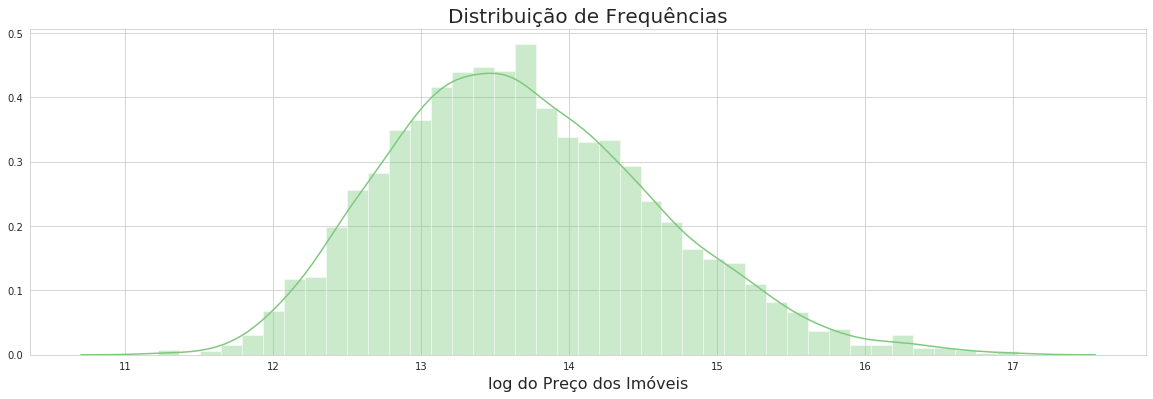

In [19]:
ax = sns.distplot(df_dados['log_Valor'])
ax.figure.set_size_inches(20, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_xlabel('log do Preço dos Imóveis', fontsize=16)
ax

# <font color='red' style='font-size: 30px;'>Verificando Relação Linear</font>
<hr style='border: 2px solid red;'>

## Gráficos de dispersão entre as variáveis transformadas do dataset

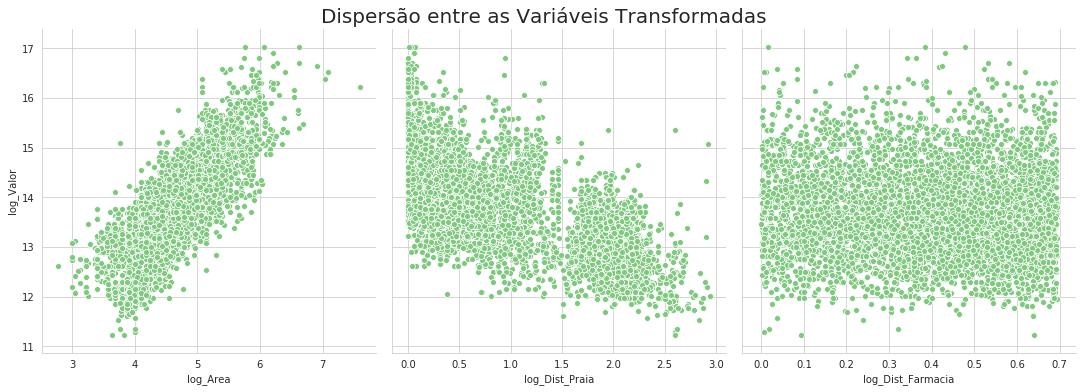

In [20]:
ax = sns.pairplot(df_dados, y_vars=['log_Valor'], x_vars=['log_Area', 'log_Dist_Praia', 'log_Dist_Farmacia'], height=5)
ax.fig.suptitle('Dispersão entre as Variáveis Transformadas', fontsize=20, y=1.05)
ax

<i>No gráfico de dispersão entre Valor e Área, observa-se uma crescente, onde quanto maior a Area, maior o Valor do imóvel;
    
   Na dispersão entre Valor e Distância da Praia, observa-se uma reta decrescente, onde quanto mais o longe o imóvel for da praia, menor o seu Valor;
    
   Na dispersão entre Valor e Distância da Farmácia não se pode ter nenhuma inferência, pois existe uma constante na dispersão ao longo do gráfico.
</i>

# <font color='red' style='font-size: 30px;'>Criando os *Datasets* de Treino e Teste</font>
<hr style='border: 2px solid red;'>

In [21]:
from sklearn.model_selection import train_test_split

## Criando uma Series (pandas) para armazenar o Preço dos Imóveis (y)

In [22]:
y = df_dados['log_Valor']

## Criando um DataFrame (pandas) para armazenar as variáveis explicativas (X)

In [23]:
X = df_dados[['log_Area','log_Dist_Praia','log_Dist_Farmacia']]

## Criando os datasets de treino e de teste

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

# Regresão Linear


In [25]:
import statsmodels.api as sm

## Estimando o modelo com statsmodels

In [26]:
X_train

,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,5.945421,0.000000,0.382273
912,3.135494,0.972865,0.605015
3042,4.317488,1.794961,0.486594
141,3.401197,0.310455,0.599609
3854,5.676754,0.032193,0.101903
...,...,...,...
3657,5.075174,2.023480,0.333605
979,4.174387,2.296141,0.156465
2389,4.394449,1.367741,0.409727
447,3.951244,2.166841,0.217381


In [27]:
X_train_constante = sm.add_constant(X_train)

In [28]:
X_train_constante

,const,log_Area,log_Dist_Praia,log_Dist_Farmacia
2661,1.0,5.945421,0.000000,0.382273
912,1.0,3.135494,0.972865,0.605015
3042,1.0,4.317488,1.794961,0.486594
141,1.0,3.401197,0.310455,0.599609
3854,1.0,5.676754,0.032193,0.101903
...,...,...,...,...
3657,1.0,5.075174,2.023480,0.333605
979,1.0,4.174387,2.296141,0.156465
2389,1.0,4.394449,1.367741,0.409727
447,1.0,3.951244,2.166841,0.217381


<b>OLS - 'mínimos quadrados ordinários' é um tipo de método de mínimos quadrados lineares para estimar os parâmetros desconhecidos em um modelo de regressão linear.<b/>

In [29]:
#Calcula o OlS e em seguida o ajuste (fit)
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do modelo


In [30]:
#Resultados estatísticos
modelo_statsmodels.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     5495.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:37:02   Log-Likelihood:                -2044.9
No. Observations:                4000   AIC:                             4098.
Df Residuals:                    3996   BIC:                             4123.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 9.3417      0.060    154.734      0.000       9.223       9.460
log_Area              1.0580      0.012     89.320      0.000       1.035       1.081
log_Dist_Praia       -0.4905      0.009    -56.690      0.000      -0.508      -0.474
log_Dist_Farmacia    -0.0167      0.032     -0.521      0.603      -0.080       0.046
==============================================================================
Omnibus:                       64.751   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.858
Skew:                           0.136   Prob(JB):                     6.25e-24
Kurtosis:                       3.753   Cond. No.                         47.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<i>
    Neste sumário de estatísticas, podem ser observados alguns pontos importantes: 
    
    R-squared (R²) - possui um ajuste de 0.80;
    
    F-statistic - porcentagem da significância estatística. Sendo que de 95% ou mais, essa estatística é significativa para o modelo;
    
    P>|t| - também trata da significância. Nessa coluna, observa-se que a variável log_Dist_Farmacia está acima de 0.05 (5%), ou abaixo de 95% de significância, mostrando que a hipótese nula para essa variável pode ser rejeitada, logo, essa variável pode ser eliminada da análise.
</i>

# <font color='red' style='font-size: 30px;'>Modificando o Modelo e Avaliando Novamente o Ajuste</font>
<hr style='border: 2px solid red;'>

## Criando um novo conjunto de variáveis explicativas (X)

In [31]:
X = df_dados[['log_Area', 'log_Dist_Praia']]

## Criando os datasets de treino e de teste

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2811)

## Estimando o modelo com o statsmodels

In [33]:
X_train_constante = sm.add_constant(X_train)

In [34]:
modelo_statsmodels = sm.OLS(y_train, X_train_constante, hasconst = True).fit()

## Avaliando as estatísticas de teste do novo modelo

In [35]:
print(modelo_statsmodels.summary())

                            OLS Regression Results                            
Dep. Variable:              log_Valor   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     8244.
Date:                Wed, 08 Jul 2020   Prob (F-statistic):               0.00
Time:                        17:37:02   Log-Likelihood:                -2045.1
No. Observations:                4000   AIC:                             4096.
Df Residuals:                    3997   BIC:                             4115.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              9.3349      0.059    158.

# <font color='red' style='font-size: 30px;'>Estimando o Modelo com os Dados de Treino</font>
<hr style='border: 2px solid red;'>

## Importando *LinearRegression* e *metrics* da biblioteca *scikit-learn*


In [36]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics 

## Instanciando a classe *LinearRegression()*

In [37]:
modelo = LinearRegression()

## Utilizando o método *fit()* do objeto "modelo" para estimar nosso modelo linear utilizando os dados de TREINO (y_train e X_train)


In [38]:
modelo.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Obtendo o coeficiente de determinação (R²) do modelo estimado com os dados de TREINO

<i>O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. É um valor entra 0 e 1.

In [39]:
print('R²= {}'.format(modelo.score(X_train, y_train).round(3)))
#Mesmo resultado obtido no statsmodels.summary (R-squared)

R²= 0.805


## Gerando previsões para os dados de TESTE (X_test) utilizando o método *predict()* do objeto "modelo"

In [40]:
y_previsto = modelo.predict(X_test)

## Obtendo o coeficiente de determinação (R²) para as previsões do nosso modelo

In [41]:
print('R²= {}'.format(metrics.r2_score(y_test, y_previsto).round(3)))

R²= 0.79


# <font color='red' style='font-size: 30px;'>Obtendo Previsões Pontuais</font>
<hr style='border: 2px solid red;'>

## Dados de entrada

In [42]:
entrada = X_test[0:1]   #Pega o primeiro registro do dataset de teste
entrada

,log_Area,log_Dist_Praia
1006,5.273,1.282769


## Gerando previsão pontual

In [43]:
#Faz a previsão do primeiro elemento da variável entrada,porém o resultado retornado é em log
modelo.predict(entrada)[0]   

14.28482006184788

## Invertendo a transformação para obter a estimativa em R$

In [44]:
#Para inverter um elemento log para seu valor real, utiliza-se a função exponencial np.exp()
print('Valor (previsto) do Imóvel = R${:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

Valor (previsto) do Imóvel = R$1598889.78


## Criando um simulador simples

In [45]:
Area = 250
Dist_Praia = 1
entrada = [[np.log(Area), np.log(Dist_Praia + 1)]]   #Em alguns casos, a variável Dist_Praia pode ser 0, por isso soma-se + 1 para eliminar esses valores nulos

print('Valor (previsto) do Imóvel = R${:.2f}'.format(np.exp(modelo.predict(entrada)[0])))

Valor (previsto) do Imóvel = R$2777292.84


# <font color='red' style='font-size: 30px;'>Interpretação dos Coeficientes Estimados</font>
<hr style='border: 2px solid red;'>

## Obtendo o intercepto do modelo

In [46]:
np.exp(modelo.intercept_)

11326.681428069882

<i>Eliminando o efeito de todas as variáveis explicativas, o efeito médio no preço dos imóveis é de 11326.68 R$ </i>

## Obtendo os coeficientes de regressão

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>Os <b>coeficientes de regressão</b> $\beta_2$ e $\beta_3$ são conhecidos como <b>coeficientes parciais de regressão</b> ou <b>coeficientes parciais angulares</b>. </p>

In [47]:
modelo.coef_

array([ 1.05807818, -0.49061226])

## Confirmando a ordem das variáveis explicativas no DataFrame

In [48]:
X.columns

Index(['log_Area', 'log_Dist_Praia'], dtype='object')

## Criando uma lista com os nomes das variáveis do modelo

In [49]:
index = ['Intercepto', 'Área', 'Distância até a praia']

## Criando um DataFrame para armazenar os coeficientes do modelo

In [50]:
pd.DataFrame(data = np.append(modelo.intercept_, modelo.coef_), index=index, columns=['Parâmetros'])

,Parâmetros
Intercepto,9.334916
Área,1.058078
Distância até a praia,-0.490612


## Interpretação dos Coeficientes Estimados

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Intercepto</b> → Excluindo o efeito das variáveis explicativas ($X_2=X_3=0$) o efeito médio no Preço dos Imóveis seria de <b>R$ 11.326,68</b> (exp[9.334916]).
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Área (m²)</b> → Mantendo-se o valor de $X_3$ (Distância até a Praia) constante, um acréscimo de 1% na Área de um imóvel gera, em média, um acréscimo de <b>1.06%</b> no Preço do Imóvel.
</p>

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>
<b>Distância até a Praia (km)</b> → Mantendo-se o valor de $X_2$ (Área) constante, um acréscimo de 1% na Distância de um imóvel até a praia gera, em média, um decréscimo de <b>0.49%</b> no Preço do Imóvel.
</p>

# <font color='red' style='font-size: 30px;'>Análises Gráficas dos Resultados do Modelo</font>
<hr style='border: 2px solid red;'>

## Gerando as previsões do modelo para os dados de TREINO

In [56]:
y_previsto = modelo.predict(X_train)

## Gráfico de dispersão entre valor estimado e valor real


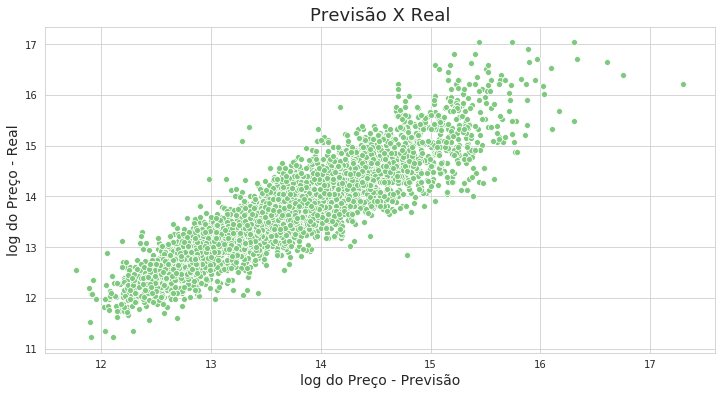

In [59]:
ax = sns.scatterplot(x = y_previsto, y = y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Previsão X Real', fontsize=18)
ax.set_xlabel('log do Preço - Previsão', fontsize=14)
ax.set_ylabel('log do Preço - Real', fontsize=14)
ax

<i>Observa-se uma reta crescente porém com algumas dispersões, que poderiam ser ajustadas com mais variáveis para o modelo<i/>

## Obtendo os resíduos
<i> São as variações que não puderam ser explicadas pelo modelo<i/>

In [60]:
residuo = y_train - y_previsto

## Plotando a distribuição de frequências dos resíduos

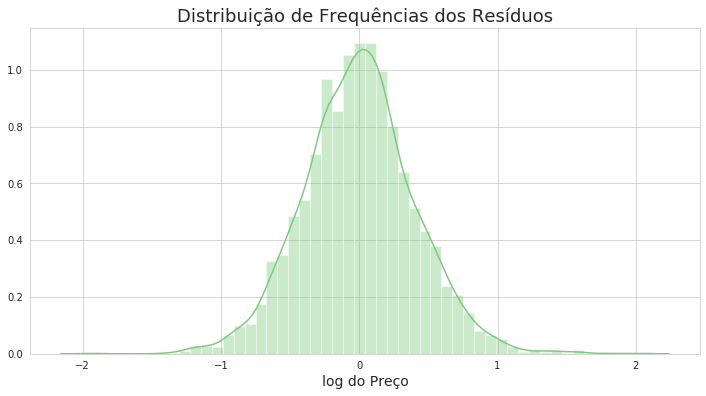

In [61]:
ax = sns.distplot(residuo)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
ax.set_xlabel('log do Preço', fontsize=14)
ax

<i>Observa-se que essa distribuição se aproxima do padrão Normal de distribuições de frequência.<i/>